<a href="https://colab.research.google.com/github/sanketpatel32/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
import zipfile

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


--2022-06-13 13:59:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   316MB/s    in 0.3s    

2022-06-13 13:59:00 (316 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import pathlib
data_dir  =pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
print(class_names)

['pizza' 'steak']


In [4]:
import random
import matplotlib.image as mpimg
import os
def veiw_random_image(target_dir , target_class):
    target_folder = target_dir + target_class 
    random_image = random.sample(os.listdir(target_folder)  ,1 )
    img = mpimg.imread(target_folder + "/" + random_image[0])
    print(random_image)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Shape : {img.shape}")
    return img / 255.


['804684.jpg']
Shape : (512, 512, 3)


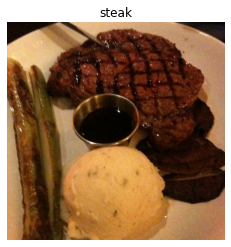

In [5]:
img = veiw_random_image(target_dir="pizza_steak/train/" , target_class="steak")

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=train_data, validation_steps=len(valid_data))


# history_1  = model_1.fit(train_data , epochs= 5 , steps_per_epoch= len(train_data))


Epoch 1/5
47/47 [==============================] - 22s 205ms/step - loss: 0.5454 - accuracy: 0.7240 - val_loss: 0.4398 - val_accuracy: 0.8027
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4447 - accuracy: 0.8147 - val_loss: 0.4475 - val_accuracy: 0.8027
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4108 - accuracy: 0.8213 - val_loss: 0.3748 - val_accuracy: 0.8477
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3643 - accuracy: 0.8500 - val_loss: 0.3495 - val_accuracy: 0.8672
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3739 - accuracy: 0.8453 - val_loss: 0.3175 - val_accuracy: 0.8711


In [8]:
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=train_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 196ms/step - loss: 0.2780 - accuracy: 0.8827 - val_loss: 0.2109 - val_accuracy: 0.9219
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.2235 - accuracy: 0.9120 - val_loss: 0.1440 - val_accuracy: 0.9512
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1762 - accuracy: 0.9367 - val_loss: 0.1223 - val_accuracy: 0.9590
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.1272 - accuracy: 0.9527 - val_loss: 0.0751 - val_accuracy: 0.9883
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0919 - accuracy: 0.9687 - val_loss: 0.0450 - val_accuracy: 0.9941


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

['2392910.jpg']
Shape : (512, 512, 3)
['1088332.jpg']
Shape : (366, 512, 3)


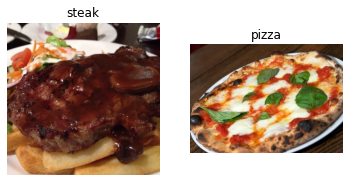

In [19]:
plt.figure()
plt.subplot(1,2,1)
steak_img = veiw_random_image(target_dir="pizza_steak/train/" , target_class="steak")
plt.subplot(1,2,2)
pizza_img = veiw_random_image(target_dir="pizza_steak/train/" , target_class="pizza")



In [21]:
train_dir , test_dir

('pizza_steak/train/', 'pizza_steak/test/')